In [196]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
import copy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [142]:
wrs = pickle.load(open("../data/wrs_senior.pkl","rb"))
# wrs_test, wrs_train = train_test_split(wrs, test_size=0.8, random_state=29)

In [143]:
# wrs = wrs.drop_duplicates(subset=['Player'], keep='first')
len(wrs)

596

In [147]:
value_inputs = wrs[["Rec_x","Yds_x","TD_x","Fmb","G_x"]]


value_inputs["Value"] = (value_inputs["Yds_x"] + 50 * (value_inputs["TD_x"] - 0.5 * value_inputs["Fmb"])) / (0.5 * value_inputs["G_x"])
y = value_inputs["Value"]
X = wrs.loc[:,"G_y":"Conf"]

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.8, random_state=29)
X_train.fillna(12, inplace = True)
X_test.fillna(12, inplace = True)

/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/leaferickson/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


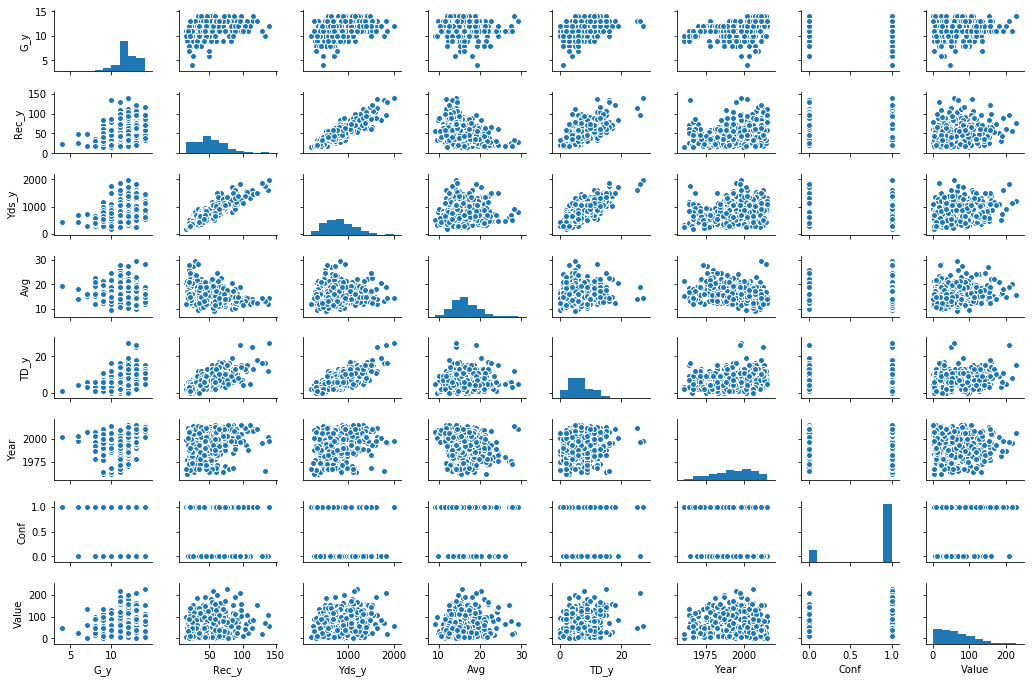

In [148]:
data = X_train.merge(pd.DataFrame(y_train), left_index = True, right_index = True)
data = data.dropna()
sns.pairplot(data, size = 1.2, aspect=1.5);

In [149]:
lm = smf.ols('Value ~ Yds_y + TD_y + Rec_y + Avg + G_y + Year + Conf', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     8.032
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           3.12e-09
Time:                        22:22:44   Log-Likelihood:                -2467.4
No. Observations:                 477   AIC:                             4951.
Df Residuals:                     469   BIC:                             4984.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      421.5845    348.590      1.209      0.227    -263.406    1106.575
Conf[T.True]    14.0612      5.396      2.606      0.009       3.458      24.665
Yds_y            0.0793      0.032      2.478      0.014       0.016       0.142
TD_y             0.7893      0.787      1.003      0.317      -0.758       2.336
Rec_y           -0.7277      0.478     -1.524      0.128      -1.666       0.211
Avg             -0.3110      1.438     -0.216      0.829      -3.136       2.514
G_y              0.6090      1.689      0.361      0.719      -2.710       3.928
Year            -0.2022      0.177     -1.141      0.254      -0.550       0.146
==============================================================================
Omnibus:                       27.655   Durbin-Watson:                   2.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.629   Prob(JB):                     1.47e-07
Kurtosis:                       2.969   Cond. No.                     3.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
lm = smf.ols('Value ~ Yds_y + Rec_y + TD_y + Year + Conf', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     11.25
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           2.89e-10
Time:                        22:23:26   Log-Likelihood:                -2467.5
No. Observations:                 477   AIC:                             4947.
Df Residuals:                     471   BIC:                             4972.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      377.8813    331.267      1.141      0.255    -273.062    1028.824
Conf[T.True]    14.2561      5.362      2.659      0.008       3.720      24.792
Yds_y            0.0738      0.017      4.322      0.000       0.040       0.107
Rec_y           -0.6355      0.221     -2.882      0.004      -1.069      -0.202
TD_y             0.8211      0.782      1.050      0.294      -0.715       2.358
Year            -0.1797      0.167     -1.076      0.283      -0.508       0.149
==============================================================================
Omnibus:                       27.926   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.806
Skew:                           0.632   Prob(JB):                     1.24e-07
Kurtosis:                       2.980   Cond. No.                     3.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
lm = smf.ols('Value ~ Yds_y + Rec_y + Conf + Conf * Rec_y', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     11.05
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           4.48e-10
Time:                        01:00:41   Log-Likelihood:                -2468.0
No. Observations:                 477   AIC:                             4948.
Df Residuals:                     471   BIC:                             4973.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      660.9457    761.708      0.868      0.386    -835.822    2157.713
Conf[T.True]    14.1960      5.369      2.644      0.008       3.646      24.746
Yds_y            0.0837      0.015      5.649      0.000       0.055       0.113
Rec_y           -6.3991     13.798     -0.464      0.643     -33.512      20.714
Year            -0.3220      0.383     -0.841      0.401      -1.074       0.430
Year:Rec_y       0.0029      0.007      0.416      0.677      -0.011       0.016
==============================================================================
Omnibus:                       27.872   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.707
Skew:                           0.632   Prob(JB):                     1.30e-07
Kurtosis:                       2.995   Cond. No.                     4.30e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [177]:
lm = smf.ols('Value ~ Yds_y + Rec_y + Conf', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     18.00
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           4.47e-11
Time:                        22:30:29   Log-Likelihood:                -2468.6
No. Observations:                 477   AIC:                             4945.
Df Residuals:                     473   BIC:                             4962.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       21.1695      7.686      2.754      0.006       6.067      36.272
Conf[T.True]    13.8948      5.357      2.594      0.010       3.367      24.422
Yds_y            0.0846      0.015      5.795      0.000       0.056       0.113
Rec_y           -0.7192      0.212     -3.393      0.001      -1.136      -0.303
==============================================================================
Omnibus:                       28.543   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.565
Skew:                           0.640   Prob(JB):                     8.49e-08
Kurtosis:                       3.010   Cond. No.                     3.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
# Create an empty model
lr = LinearRegression()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

1821.9111287954238
1974.9844946172211


In [224]:
X2 = X_train[["Yds_y", "Avg"]]
X2["Yds*Avg"] = X_train["Yds_y"]*X_train["Avg"]
X2["int"] = 1
lr = Lasso()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))
X3 = X_test[["Yds_y", "Avg"]]
X3["Yds*Avg"] = X_test["Yds_y"]*X_test["Avg"]
X3["int"] = 1
print(mean_squared_error(y_test,lr.predict(X3)))

1861.4689134063694
1969.448886044955


/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [208]:
X2 = X_train[["Yds_y", "Rec_y", "Conf", "TD_y", "Year"]]
X2["int"] = 1
lr = LinearRegression()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))
X3 = X_test[["Yds_y", "Rec_y", "Conf", "TD_y", "Year"]]
X3["int"] = 1
print(mean_squared_error(y_test,lr.predict(X3)))

1822.5707739345135
1977.0852994503773


/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [200]:
X2 = X_train[["Yds_y", "Rec_y", "Conf"]]
X2["int"] = 1
lr = LinearRegression()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))
X3 = X_test[["Yds_y", "Rec_y", "Conf"]]
X3["int"] = 1
print(mean_squared_error(y_test,lr.predict(X3)))

1831.2690792484445
2017.3214066821586


/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [232]:
lr = Lasso()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))
lr.score(X_test,y_test)

1830.2054658163358
1960.6288949984366


0.1231608439384807

In [231]:
X2 = X_train[["Yds_y", "Rec_y", "Conf", "TD_y", "Year"]]
X2["int"] = 1
X2["Rec_Conf"] = (X2["Rec_y"] * X2["Conf"])
lr = Lasso()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))
X3 = X_test[["Yds_y", "Rec_y", "Conf", "TD_y", "Year"]]
X3["int"] = 1
X3["Rec_Conf"] = (X3["Rec_y"] * X3["Conf"])
print(mean_squared_error(y_test,lr.predict(X3)))
lr.score(X_test,y_test)

1832.173620175631
1958.6717824595783


/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


-38.60426380143651

In [191]:
X2 = X_train[["Yds_y", "Rec_y", "Conf"]]
X2["int"] = 1
lr = Lasso()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))

1838.6736098453766


In [202]:
lr = Ridge()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

1821.9174269695527
1974.2352992628175


In [217]:
X2 = X_train[["Yds_y", "Rec_y", "Conf"]]
X2["int"] = 1
lr = Ridge()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))
X3 = X_test[["Yds_y", "Rec_y", "Conf"]]
X3["int"] = 1
print(mean_squared_error(y_test,lr.predict(X3)))

1831.2751777826622
2016.4506295149197


/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [197]:
lr = ElasticNet()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))

1841.4234999336504


In [198]:
X2 = X_train[["Yds_y", "Rec_y", "Conf"]]
X2["int"] = 1
lr = ElasticNet()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))

1849.8322176252552


/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
